In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine

In [3]:
iris_dataset = load_iris()

In [ ]:
# scikit-learn이 제공하는 데이터셋의 구조 확인
print( type(iris_dataset) ) # iris_dataset 은 dict와 유사한 구조
print( iris_dataset.keys() )
# print( iris_dataset['DESCR'] )
print( iris_dataset['data'][:3, :] )        # feature(X)에 해당하는 데이터 
print( iris_dataset['target'][:3] )         # target(y)에 해당하는 데이터
print( np.unique(iris_dataset['target']) )  # target(y)에 해당하는 데이터
print( iris_dataset['target_names'] )       # target(y)의 실제 값

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]
[0 1 2]
['setosa' 'versicolor' 'virginica']


In [13]:
def net_input(X, w): # X : 1D array, w : 1D array
    # return sum([x*w for x, w in zip(X, w[1:])]) + w[0]
    return np.dot(X, w[1:]) + w[0] # w1*x1 + w2*x2 + ... wn*xn + w0*1

In [15]:
net_input([1, 2, 3, 4, 5], [10, 20, 30, 40, 50, 60])

np.int64(710)

In [16]:
def activation(v):
    # if v > 0:
    #     return 1
    # else:
    #     return -1
    return 1 if v > 0 else -1

In [19]:
activation(0.7), activation(-0.2)

(1, -1)

In [20]:
def predict(X, w):
    net_value = net_input(X, w)
    activated_value = activation(net_value)
    return activated_value

In [36]:
def fit(X, y, eta, n_iter):    
    """
    데이터를 사용해서 perceptron 모델을 훈련하는 함수\n\n
    [전달인자]
    1. X : feature
    2. y : target
    3. eta : 학습률
    4. n_iter : 학습 반복 횟수
    """
    w = np.zeros(X.shape[1] + 1) # X.shape : 2차원 배열의 열 갯수
    errors = np.zeros(n_iter) # 학습 반복 횟수 크기의 오차 배열 만들기 (오차 로그용)

    for idx in np.arange(n_iter): # 학습 반복
        sum_of_error = 0
        for xv, t in zip(X, y): # 한 행의 입력 + 타겟을 뽑아서 학습 실행 * 행 갯수
            output = predict(xv, w) # net_input + activation -> 1 or -1 반환
            error = t - output      # 오차 계산 (실제값 - 출력값)
            sum_of_error += error   # 현재 학습 반복의 에러를 합산
            delta = eta * error     # 가중치 업데이트에 적용할 값 계산
            w[1:] += delta * xv     # 가중치 업데이트
            w[0] += delta * 1       # 가중치(편향) 업데이트

        errors[idx] = sum_of_error  # 에러 로그에 현재 학습 반복의 에러 추가

    return w, errors



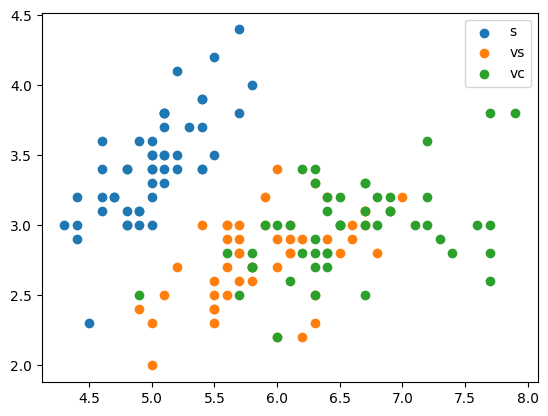

In [75]:
# 구분이 잘되는 품종 찾기
X = iris_dataset['data']
plt.scatter(X[:50, 0], X[:50, 1], label='s')
plt.scatter(X[50:100, 0], X[50:100, 1], label='vs')
plt.scatter(X[100:150, 0], X[100:150, 1], label='vc')
plt.legend()
plt.show()

In [87]:
X = iris_dataset['data'][:100]
y = iris_dataset['target'][:100] # 0 : 50개, 1 : 50개
# y = list( map(lambda v: -1 if v == 0 else 1, y) ) # 0 -> -1, 1 -> 1 로 변경
y = np.where(y == 0, -1, 1) # y의 각 값이 0이면 -1, 아니면 1로 변경 ( 모델과 출력 값이 같도록 수정)
eta, n_iter = 0.1, 10

result_w, result_errors = fit(X, y, eta, n_iter)

In [88]:
result_w, result_errors

(array([-0.2 , -0.22, -0.72,  1.04,  0.44]),
 array([ 2., -2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

In [89]:
sum_of_error = 0
for vx, t in zip(X, y):
    predicted_value = predict(vx, result_w) # 학습된 가중치를 사용해서 값 예측    
    sum_of_error += (predicted_value != t)  # 예측이 틀리면 error 1 증가

print("Accuracy : {0}".format(1 - (sum_of_error / 100))) # 정확도(에러/데이터갯수) 출력 
    

Accuracy : 1.0


In [91]:
wine_dataset = load_wine()

In [97]:
wine_dataset.keys()
# wine_dataset['target'], wine_dataset['target_names']
# print( wine_dataset['DESCR'] )

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
# wine_dataset을 사용해서 class_0과 나머지를 구분하는 이진 퍼셉트론 모델 사용